<a href="https://colab.research.google.com/github/tosmeley/project_folder/blob/main/week_6_tuesday_tensorflow_tuesday_excercise_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.1 kB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 2.9 MB 44.2 MB/s 
     |████████████████████████████████| 503 kB 58.7 MB/s 
     |████████████████████████████████| 3.8 MB 39.8 MB/s 
     |████████████████████████████████| 20.1 MB 1.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7485bfaeae2cef7608e9dd981da98c896e5dd65304cd85fb7e0ddc00299c077e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [4]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

MNIST Datasize: Training samples: {0}, Testing samples: {1}


In [5]:
# Network parameters of Neural Network
n_input = 784     # Input image size of size 28 x 28
n_hidden_1 = 512  # First hidden layer
n_hidden_2 = 256  # Second hidden layer
n_hidden_3 = 128  # Third hidden layer
n_output = 10     # Output layer having (0-9) digits

In [6]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [7]:
# Building TensorFlow graph
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [8]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout": tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
             }

nn_bias = {"B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
           "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
           "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
           "B4": tf.Variable(tf.truncated_normal([n_output])),
          }

In [9]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]), nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]), nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

# Define prediction
prediction_out = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))

# Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [11]:
# Executing the computational graph

with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    # print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})

    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})
    
      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0}, Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))
      
  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")

Iterations : 0, Train_loss = 36.39706802368164, Train_Accuracy 0.1171875, Val_loss 36.39706802368164, Val_accuracy 0.1171875
Iterations : 100, Train_loss = 9.351947784423828, Train_Accuracy 0.3671875, Val_loss 9.351947784423828, Val_accuracy 0.3671875
Iterations : 200, Train_loss = 4.444694519042969, Train_Accuracy 0.578125, Val_loss 4.444694519042969, Val_accuracy 0.578125
Iterations : 300, Train_loss = 4.842238426208496, Train_Accuracy 0.5859375, Val_loss 4.842238426208496, Val_accuracy 0.5859375
Iterations : 400, Train_loss = 2.527493953704834, Train_Accuracy 0.6953125, Val_loss 2.527493953704834, Val_accuracy 0.6953125
Iterations : 500, Train_loss = 2.8991105556488037, Train_Accuracy 0.7265625, Val_loss 2.8991105556488037, Val_accuracy 0.7265625
Iterations : 600, Train_loss = 2.4059689044952393, Train_Accuracy 0.7421875, Val_loss 2.4059689044952393, Val_accuracy 0.7421875
Iterations : 700, Train_loss = 2.6521527767181396, Train_Accuracy 0.734375, Val_loss 2.6521527767181396, Val_ac

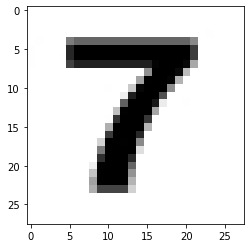

Prediction for test image is [0]


In [14]:
img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1, -1)/255
dum.shape

with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))